In [1]:
import pandas as pd
import numpy as np
import os
from products_per_country import *

print(os.getcwd())
# controleer altijd of je in de map helpfiles zit

C:\Users\boble\Documents\GitHub\DataProcessing\helpfiles


In [2]:
from select_df import select_df

df_foodprices = select_df(1, 'foodprices')
df_migration = select_df(1, 'migration_movements')
df_weather = select_df(1, 'temperature_and_precipitation')

Succesfully imported foodprices!
Succesfully imported migration_movements!
succesfully imported temperature_and_precipitation!


# Select migration movements

In [3]:
def select_plot_migration_movements(input_data,origin, year1, year2):
    input_data = input_data.loc[input_data['Origin'] == origin]
    input_data = input_data.loc[(input_data['Timestamp'] > year1) & (input_data['Timestamp'] < year2)]
    return input_data

In [4]:
test = select_plot_migration_movements(df_migration, 'Gambia', 1980, 2017)
test

Origin    Timestamp  Value
22    Gambia  1999.000000      9
52    Gambia  1999.083333     26
82    Gambia  1999.166667     38
116   Gambia  1999.250000     31
150   Gambia  1999.333333     25
184   Gambia  1999.416667     40
233   Gambia  1999.500000     34
253   Gambia  1999.583333     24
280   Gambia  1999.666667     40
332   Gambia  1999.750000     43
359   Gambia  1999.833333     53
393   Gambia  1999.916667     60
419   Gambia  2000.000000     47
467   Gambia  2000.083333     49
505   Gambia  2000.166667     57
530   Gambia  2000.250000     42
565   Gambia  2000.333333     38
594   Gambia  2000.416667     53
631   Gambia  2000.500000     65
677   Gambia  2000.583333     82
687   Gambia  2000.666667     83
735   Gambia  2000.750000     67
769   Gambia  2000.833333     43
797   Gambia  2000.916667     47
834   Gambia  2001.000000     55
857   Gambia  2001.083333     49
888   Gambia  2001.166667     51
929   Gambia  2001.250000     55
985   Gambia  2001.333333     95
1005  Gambia  2001.416667     86
...      ...          ...    ...
6380  Gambia  2014.583333   2233
6410  Gambia  2014.666667   2650
6432  Gambia  2014.750000   2418
6467  Gambia  2014.833333   2278
6505  Gambia  2014.916667   2354
6547  Gambia  2015.000000   2222
6595  Gambia  2015.083333   2193
6615  Gambia  2015.166667   1949
6641  Gambia  2015.250000   1821
6691  Gambia  2015.333333   2023
6713  Gambia  2015.416667   2274
6755  Gambia  2015.500000   2466
6776  Gambia  2015.583333   2503
6816  Gambia  2015.666667   2715
6859  Gambia  2015.750000   2431
6875  Gambia  2015.833333   1665
6916  Gambia  2015.916667   1682
6959  Gambia  2016.000000   2098
6996  Gambia  2016.083333   2388
7036  Gambia  2016.166667   2635
7064  Gambia  2016.250000   2708
7091  Gambia  2016.333333   2956
7118  Gambia  2016.416667   3594
7164  Gambia  2016.500000   3543
7194  Gambia  2016.583333   2940
7226  Gambia  2016.666667   2556
7272  Gambia  2016.750000   2690
7293  Gambia  2016.833333   2775
7315  Gambia  2016.916667   2573
7361  Gambia  2017.000000   2698

[217 rows x 3 columns]

# Select temperature and precipitation

In [5]:
# geeft voor een #input_data van een #country de pr en tas vanaf #year1 tot en met #year2

def select_plot_temperature_and_precipitation(input_data, country, year1, year2):
    saved_dict = {'Mauritania': 'MRT', 'Lesotho': 'LSO', 'Somalia': 'SOM', 'Nigeria': 'NGA', 'Tanzania': 'TZA', 'Zambia': 'ZMB', 'Burundi': 'BDI', 'Afghanistan': 'AFG', 'Mali': 'MLI', 'Niger': 'NER', 'Malawi': 'MWI', 'Congo': 'ZAR', 'Cabo Verde': 'CPV', 'Sudan': 'SDN', 'Pakistan': 'PAK', 'Burkina Faso': 'BFA', 'Rwanda': 'RWA', 'Kenya': 'KEN', 'Senegal': 'SEN', 'Cameroon': 'CMR', 'Sierra Leone': 'SLE', 'Iraq': 'IRQ', 'Uganda': 'UGA', 'Mozambique': 'MOZ', 'Zimbabwe': 'ZWE', 'Central African Republic': 'CAF', 'Ethiopia': 'ETH', 'Guinea': 'GIN', 'Liberia': 'LBR', 'Djibouti': 'DJI', 'Iran': 'IRN', 'Madagascar': 'MDG', 'Lebanon': 'LBN'}

    if country in saved_dict.keys():
        country = saved_dict[country]
    else:
        print("Please enter correct country name")
    
    input_data = pd.DataFrame(input_data.loc[input_data['country'] == country])
    input_data = input_data.loc[(input_data['year'] > year1 - 1) & (input_data['year'] < year2 + 1)]
    
#     maak van de jaren en maanden kommajaren
    YearMonth = []
    month = []
    for row in input_data['month']:
        month.append(str(row))
        
    count = 0
    for year in input_data['year']:
        year = int(year) + (int(month[count])  - 1)/ 12
        YearMonth.append(year)
        count += 1
    input_data['YearMonth'] = YearMonth
    input_data = input_data[['pr', 'tas', 'country', 'YearMonth']]
    return input_data

select_plot_temperature_and_precipitation(df_weather, 'Lesotho', 1985, 2030)

pr       tas country    YearMonth
6000  204.68800  18.64720     LSO  1991.000000
6001  124.99700  17.88130     LSO  1991.083333
6002  110.43400  15.83400     LSO  1991.166667
6003    3.49657  13.68640     LSO  1991.250000
6004    3.86758  10.60940     LSO  1991.333333
6005   13.04190   6.57098     LSO  1991.416667
6006    0.94483   7.48768     LSO  1991.500000
6007    3.26394   8.87845     LSO  1991.583333
6008   59.57440  13.14010     LSO  1991.666667
6009  154.31900  14.26600     LSO  1991.750000
6010   62.73080  15.83960     LSO  1991.833333
6011  124.43400  16.87680     LSO  1991.916667
6012   49.29210  19.62300     LSO  1992.000000
6013   57.49860  19.70280     LSO  1992.083333
6014   62.94090  17.33280     LSO  1992.166667
6015   20.05400  14.93980     LSO  1992.250000
6016    0.68631   9.65732     LSO  1992.333333
6017    0.44241   6.48702     LSO  1992.416667
6018    0.59084   7.15533     LSO  1992.500000
6019   44.59960   8.54639     LSO  1992.583333
6020    9.06036  13.96630     LSO  1992.666667
6021   69.61680  14.46120     LSO  1992.750000
6022  101.27500  15.19780     LSO  1992.833333
6023   63.34060  18.55760     LSO  1992.916667
6024   75.85950  19.70190     LSO  1993.000000
6025   99.88270  17.25200     LSO  1993.083333
6026   83.61760  16.52780     LSO  1993.166667
6027   49.64940  12.83620     LSO  1993.250000
6028   13.56430  10.22040     LSO  1993.333333
6029    3.70470   7.32104     LSO  1993.416667
...         ...       ...     ...          ...
6270    5.44050   8.85943     LSO  2013.500000
6271    4.86976   9.26293     LSO  2013.583333
6272    3.13513  13.47990     LSO  2013.666667
6273   62.14280  14.59120     LSO  2013.750000
6274   78.71600  16.64490     LSO  2013.833333
6275  188.62700  17.47640     LSO  2013.916667
6276   52.83950  20.12130     LSO  2014.000000
6277  199.34500  18.97260     LSO  2014.083333
6278   92.50900  16.70830     LSO  2014.166667
6279   34.03540  12.86790     LSO  2014.250000
6280   11.37930  10.58150     LSO  2014.333333
6281    2.39011   7.33333     LSO  2014.416667
6282    2.87602   7.68890     LSO  2014.500000
6283   13.77780  10.01210     LSO  2014.583333
6284    8.51619  13.88260     LSO  2014.666667
6285   31.47690  15.31350     LSO  2014.750000
6286  168.34100  15.56750     LSO  2014.833333
6287  115.96500  17.59910     LSO  2014.916667
6288   64.11730  19.14420     LSO  2015.000000
6289   54.89620  17.88450     LSO  2015.083333
6290   98.94550  17.37620     LSO  2015.166667
6291   25.89570  13.08760     LSO  2015.250000
6292    9.97749  11.13490     LSO  2015.333333
6293   36.81640   7.23080     LSO  2015.416667
6294   18.16340   7.80643     LSO  2015.500000
6295   14.76850   8.74273     LSO  2015.583333
6296   31.65650  13.30430     LSO  2015.666667
6297   35.01170  15.66440     LSO  2015.750000
6298   48.63930  15.77170     LSO  2015.833333
6299   29.61620  19.24540     LSO  2015.916667

[300 rows x 4 columns]

In [6]:
df_foodprices

Unnamed: 0  Unnamed: 0.1                    adm0_name adm1_name  \
0                0         24213                 Burkina Faso  Cascades   
1                1         24214                 Burkina Faso  Cascades   
2                2         24215                 Burkina Faso  Cascades   
3                3         24216                 Burkina Faso  Cascades   
4                4         24217                 Burkina Faso  Cascades   
5                5         24218                 Burkina Faso  Cascades   
6                6         24219                 Burkina Faso  Cascades   
7                7         24220                 Burkina Faso  Cascades   
8                8         24221                 Burkina Faso  Cascades   
9                9         24222                 Burkina Faso  Cascades   
10              10         24223                 Burkina Faso  Cascades   
11              11         24224                 Burkina Faso  Cascades   
12              12         24225                 Burkina Faso  Cascades   
13              13         24226                 Burkina Faso  Cascades   
14              14         24227                 Burkina Faso  Cascades   
15              15         24228                 Burkina Faso  Cascades   
16              16         24229                 Burkina Faso  Cascades   
17              17         24230                 Burkina Faso  Cascades   
18              18         24231                 Burkina Faso  Cascades   
19              19         24232                 Burkina Faso  Cascades   
20              20         24233                 Burkina Faso  Cascades   
21              21         24234                 Burkina Faso  Cascades   
22              22         24235                 Burkina Faso  Cascades   
23              23         24236                 Burkina Faso  Cascades   
24              24         24237                 Burkina Faso  Cascades   
25              25         24238                 Burkina Faso  Cascades   
26              26         24239                 Burkina Faso  Cascades   
27              27         24240                 Burkina Faso  Cascades   
28              28         24241                 Burkina Faso  Cascades   
29              29         24242                 Burkina Faso  Cascades   
...            ...           ...                          ...       ...   
468361       60291        237261  Iran  (Islamic Republic of)    Tehran   
468362       60292        237262  Iran  (Islamic Republic of)    Tehran   
468363       60293        237263  Iran  (Islamic Republic of)    Tehran   
468364       60294        237264  Iran  (Islamic Republic of)    Tehran   
468365       60295        237265  Iran  (Islamic Republic of)    Tehran   
468366       60296        237266  Iran  (Islamic Republic of)    Tehran   
468367       60297        237267  Iran  (Islamic Republic of)    Tehran   
468368       60298        237268  Iran  (Islamic Republic of)    Tehran   
468369       60299        237269  Iran  (Islamic Republic of)    Tehran   
468370       60300        237270  Iran  (Islamic Republic of)    Tehran   
468371       60301        237271  Iran  (Islamic Republic of)    Tehran   
468372       60302        237272  Iran  (Islamic Republic of)    Tehran   
468373       60303        237273  Iran  (Islamic Republic of)    Tehran   
468374       60304        237274  Iran  (Islamic Republic of)    Tehran   
468375       60305        237275  Iran  (Islamic Republic of)    Tehran   
468376       60306        237276  Iran  (Islamic Republic of)    Tehran   
468377       60307        237277  Iran  (Islamic Republic of)    Tehran   
468378       60308        237278  Iran  (Islamic Republic of)    Tehran   
468379       60309        237279  Iran  (Islamic Republic of)    Tehran   
468380       60310        237280  Iran  (Islamic Republic of)    Tehran   
468381       60311        237281  Iran  (Islamic Republic of)    Tehran   
468382       60312        237282 

# Select foodprices per market

In [31]:
def select_plot_foodprices_per_market(input_data, country, product, year1, year2):
    input_data = input_data.loc[input_data['adm0_name'] == country]
    input_data = input_data.loc[input_data['cm_name'] == product]
    input_data = input_data.loc[(input_data['Year'] >= year1) & (input_data['Year'] < year2 + 1)]
    return input_data

select_plot_foodprices_per_market(df_foodprices, 'Zimbabwe', 'Cowpeas', 1990, 2020)

Unnamed: 0  Unnamed: 0.1 adm0_name   adm1_name mkt_name  cm_name  \
405651      405651        762716  Zimbabwe      Harare    Mbare  Cowpeas   
405652      405652        762717  Zimbabwe      Harare    Mbare  Cowpeas   
405653      405653        762718  Zimbabwe      Harare    Mbare  Cowpeas   
405654      405654        762719  Zimbabwe      Harare    Mbare  Cowpeas   
405655      405655        762720  Zimbabwe      Harare    Mbare  Cowpeas   
405656      405656        762721  Zimbabwe      Harare    Mbare  Cowpeas   
405657      405657        762722  Zimbabwe      Harare    Mbare  Cowpeas   
405658      405658        762723  Zimbabwe      Harare    Mbare  Cowpeas   
405659      405659        762724  Zimbabwe      Harare    Mbare  Cowpeas   
405660      405660        762725  Zimbabwe      Harare    Mbare  Cowpeas   
405661      405661        762726  Zimbabwe      Harare    Mbare  Cowpeas   
405662      405662        762727  Zimbabwe      Harare    Mbare  Cowpeas   
405663      405663        762728  Zimbabwe      Harare    Mbare  Cowpeas   
405664      405664        762729  Zimbabwe      Harare    Mbare  Cowpeas   
405665      405665        762730  Zimbabwe      Harare    Mbare  Cowpeas   
405666      405666        762731  Zimbabwe      Harare    Mbare  Cowpeas   
405667      405667        762732  Zimbabwe      Harare    Mbare  Cowpeas   
405668      405668        762733  Zimbabwe      Harare    Mbare  Cowpeas   
405669      405669        762734  Zimbabwe      Harare    Mbare  Cowpeas   
405670      405670        762735  Zimbabwe      Harare    Mbare  Cowpeas   
405671      405671        762736  Zimbabwe      Harare    Mbare  Cowpeas   
405672      405672        762737  Zimbabwe      Harare    Mbare  Cowpeas   
406647      406647        763712  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406648      406648        763713  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406649      406649        763714  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406650      406650        763715  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406651      406651        763716  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406652      406652        763717  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406653      406653        763718  Zimbabwe    Masvingo  Mucheke  Cowpeas   
406654      406654        763719  Zimbabwe    Masvingo  Mucheke  Cowpeas   
407099      407099        764164  Zimbabwe  Manicaland  Sakubva  Cowpeas   
407100      407100        764165  Zimbabwe  Manicaland  Sakubva  Cowpeas   
407101      407101        764166  Zimbabwe  Manicaland  Sakubva  Cowpeas   
407102      407102        764167  Zimbabwe  Manicaland  Sakubva  Cowpeas   
407103      407103        764168  Zimbabwe  Manicaland  Sakubva  Cowpeas   
407104      407104        764169  Zimbabwe  Manicaland  Sakubva  Cowpeas   

       cur_name pt_name  um_id um_name  mp_month  mp_year  mp_price  \
405651      USD  Retail      5      KG         8     2014      1.00   
405652      USD  Retail      5      KG        10     2014      1.00   
405653      USD  Retail      5      KG        11     2014      1.00   
405654      USD  Retail      5      KG         4     2015      0.57   
405655      USD  Retail      5      KG         5     2015      0.57   
405656      USD  Retail      5      KG         6     2015      0.57   
405657      USD  Retail      5      KG         7     2015      0.75   
405658      USD  Retail      5      KG         8     2015      0.75   
405659      USD  Retail      5      KG         9     2015      0.75   
405660      USD  Retail      5      KG        10     2015      0.75   
405661      USD  Retail      5      KG        11     2015      0.70   
405662      USD  Retail      5      KG        12     2015      0.70   
405663      USD  Retail      5      KG         1     2016      0.70   
405664      USD  Retail      5      KG         2     2016      0.70   
405665      USD  Retail      5      KG         8     2016      0.75   
405666      USD  Retail      5      KG         1     2017  

In [129]:
# returns the countries with the input product

def select_plot_countries_per_product(input_data, product):
    input_data = input_data.loc[input_data['cm_name'] == product]
    return list(input_data.adm0_name.unique())

select_plot_countries_per_product(df_foodprices, 'Rice (local)')

['Democratic Republic of the Congo',
 'Guinea',
 'Madagascar',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Zambia',
 'Iran  (Islamic Republic of)']

In [32]:
# 

def select_plot_foodprices_average(input_data, country, product, year1, year2):
    input_data = select_plot_foodprices_per_market(input_data, country, product, year1, year2)
    
    country_list = []
    product_list = []
    average_price_list = []
    year_list = []
    
    for i in range(year1, year2 + 1):
        for j in range(12):
#             Selecteer een specifieke maand in een jaar
            output_data = input_data.loc[input_data['mp_year'] == i]
            output_data = output_data.loc[output_data['mp_month'] == j + 1]
#         maak een nieuwe rij wanneer er data beschikbaar is
            if len(output_data['mp_price']) > 0:
#                 year
                year_list.append(i + (j / 12))

#                 country
                country_list.append(country)

#                 product
                product_list.append(product)
#                 average data            
                average_price_list.append(sum(output_data['mp_price']) / len(output_data['mp_price']))

    
    output_data = pd.DataFrame()    
    output_data['country'] = country_list
    output_data['year'] = year_list
    output_data['product'] = product_list
    output_data['average_price'] = average_price_list
    return output_data

select_plot_foodprices_average(df_foodprices, 'Zimbabwe', 'Cowpeas', 1998, 2018)    

country         year  product  average_price
0   Zimbabwe  2014.583333  Cowpeas       1.286667
1   Zimbabwe  2014.750000  Cowpeas       0.850000
2   Zimbabwe  2014.833333  Cowpeas       1.000000
3   Zimbabwe  2015.250000  Cowpeas       0.570000
4   Zimbabwe  2015.333333  Cowpeas       0.570000
5   Zimbabwe  2015.416667  Cowpeas       0.570000
6   Zimbabwe  2015.500000  Cowpeas       0.750000
7   Zimbabwe  2015.583333  Cowpeas       0.750000
8   Zimbabwe  2015.666667  Cowpeas       0.750000
9   Zimbabwe  2015.750000  Cowpeas       0.750000
10  Zimbabwe  2015.833333  Cowpeas       0.700000
11  Zimbabwe  2015.916667  Cowpeas       0.700000
12  Zimbabwe  2016.000000  Cowpeas       0.700000
13  Zimbabwe  2016.083333  Cowpeas       0.700000
14  Zimbabwe  2016.583333  Cowpeas       0.750000
15  Zimbabwe  2017.000000  Cowpeas       0.916667
16  Zimbabwe  2017.083333  Cowpeas       1.183333
17  Zimbabwe  2017.166667  Cowpeas       1.183333
18  Zimbabwe  2017.250000  Cowpeas       1.183333
19  Zimbabwe  2017.333333  Cowpeas       1.183333
20  Zimbabwe  2017.416667  Cowpeas       0.510000
21  Zimbabwe  2017.500000  Cowpeas       0.450000

In [9]:
def normalize(input_data, column):
    values = []
    
    input_data[column]
    for value in input_data[column]:
         values.append(value)
            
    Min = min(values)
    Max = max(values)
        
    output_data = []
    for value in input_data[column]:
        output_data.append((value - Min)/(Max - Min))
    
    input_data['Normalized_data'] = output_data
    
    return input_data

In [10]:
def possible_range(data1, data2):
    # bepaal de range van dataset 1 (migration movements)
    min1 = float(data1.head(1))
    max1 = float(data1.tail(1))
    # bepaal de range van dataset 2 (foodprices average)
    min2 = float(data2.head(1))
    max2 = float(data2.tail(1))

    # bepaal de mogelijke combinatie range
    if min1 >= min2: year_min = int(np.ceil(min1))
    else: year_min = int(np.ceil(min2))
    if max1 <= max2: year_max = int(np.ceil(max1))
    else: year_max = int(np.ceil(max1))
        
    return(year_min, year_max)

# werking
# data1 = select_plot_migration_movements1(df_migration, 'Zimbabwe', 1990, 2018)['Timestamp']
# data2 = select_plot_foodprices_average(df_foodprices, 'Zimbabwe', 'Cowpeas', 1990, 2018)['year']
# possible_range(data1, data2)

# Plot functies
# |
# |

In [33]:
from bokeh.plotting import figure
from bokeh.io import output_file, show, save

import pandas

# Make sure x and y are of the same length.
x1 = select_plot_foodprices_average(df_foodprices, 'Lesotho', 'Beans (sugar-red)', 2004, 2014)['year'] 
y1 = normalize(select_plot_foodprices_average(df_foodprices, 'Lesotho', 'Beans (sugar-red)', 2004, 2014), 'average_price')['Normalized_data']  

x2 = select_plot_temperature_and_precipitation(df_weather, 'Lesotho', 2004, 2014)['YearMonth']    
y2 = normalize(select_plot_temperature_and_precipitation(df_weather, 'Lesotho', 2004, 2014), 'tas')['Normalized_data']    

f = figure(plot_width=1500, plot_height=600)

# Plot the line
f.line(x1, y1, color='red')
f.line(x2, y2, color='blue')

show(f)

In [35]:
# vergelijkt de gemiddelde voedselprijs met de prijzen per markt

country = 'Guinea'
product = 'Rice (local)'

df = select_plot_foodprices_per_market(df_foodprices, country, product, 1990, 2020)

f = figure(plot_width=832, plot_height=300)

# gemiddelde voedselprijzen
x2 = select_plot_foodprices_average(df_foodprices, country, product, 1990, 2020)['year']
y2 = select_plot_foodprices_average(df_foodprices, country, product, 1990, 2020)['average_price']
    
# foodprices per markt
for market in df.mkt_name.unique():
    df_market = df.loc[df.mkt_name == df.mkt_name.unique()[0]]

    x1 = df['Year'] 
    y1 = df['mp_price']

    f.scatter(x1, y1, color='lightgrey', size=5, legend="Individual market prices")
    
# design
f.title.text="Correlatie tussen de individuele marktprijzen van {} and the average market price in {}.".format(product, country)
f.xaxis.axis_label = "Jaar"
f.yaxis.axis_label = "Prijs in lokale valuta"
f.legend.location = "top_left"

f.line(x2, y2, color='red', legend="Average foodprice")

show(f)

In [120]:
# compares the normalized average foodprices per country 

from bokeh.palettes import Set1

# choose country:
country = 'Mozambique'

colormap = ['red', 'green','blue', 'yellow','orange','brown', 'turquoise','black', 'purple', 'rosybrown', 'pink','magenta',
    'darkblue','chartreuse','aqua','indianred','darkturquoise','grey', 'lightskyblue','blueviolet', 'sandybrown', 'crimson', 
    'white', 'tan','y', 'gold', 'mintcream']

f = figure(plot_width=832, plot_height=416)
count = 0
   
# foodprices per markt
for product in products_country(df_foodprices, country):
    count += 1
    df = select_plot_foodprices_average(df_foodprices, country, product, 1990, 2020)
    x = df['year'] 
    y = normalize(df, 'average_price')['Normalized_data']

    f.line(x, y, color=colormap[count], legend="{}".format(product))
    
# design
f.legend.click_policy="hide"
f.xaxis.axis_label = "Jaar"
f.yaxis.axis_label = "Genormaliseerde prijs"
f.legend.location = "top_left"
show(f)

In [56]:
products_country(df_foodprices, 'Mali')

['Maize',
 'Sorghum',
 'Millet',
 'Rice (imported)',
 'Rice (local)',
 'Fonio',
 'Beans (niebe)',
 'Rice (paddy)']

In [13]:
x1 = normalize(select_plot_migration_movements(df_migration, 'Zimbabwe', 2004, 2018), 'Value')['Normalized_data']    
y1 = normalize(select_plot_foodprices_average(df_foodprices, 'Zimbabwe', 'Cowpeas', 2004, 2018), 'average_price')['Normalized_data']  

output_file("Line.html")

# Create a figure (that's 600x600)
f = figure(plot_width=600, plot_height=600)
f.xaxis.axis_label = "Temperature and precipitation"
f.yaxis.axis_label = "Average foodprices"

# Plot the line
f.circle(x1, y1, color='red')

show(f)

c:\users\boble\appdata\local\programs\python\python36-32\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 161), ('y', 22)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [14]:
# checks if a product is in the foodprices dataset, if not, it returns a list of all available products in a given country
def check_product_in_foodprices(set_country, set_product, foodprices):
    
    set_product = '-' + set_product
    product_list = []
    for product in foodprices.loc[foodprices['adm0_name'] == set_country]['cm_name']:
        if '-' + product not in product_list:
            product_list.append('-' + product)

    d = {'Product_List' : product_list}

    df = pd.DataFrame(data=d)    
    
    if not set_product in product_list:
        print('Error, product not recognized. Choose a product from the list below')
        return df
    else:
        return 'Succesfully imported values!'

# Plot stacked Area chart
Geeft inzicht in de vluchtelingen naar Europa

In [15]:
# Helpfile landen en producten

Africa = ['Central African Republic', 'Djibouti', 'Gambia', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
                'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'South Sudan', 
                'Sudan', 'Uganda', 'Zambia', 'Zimbabwe']
# Kenya, Lesotho veroorzaakte problemen
Middle_East = ['Afghanistan', 'Iraq', 'Iran  (Islamic Republic of)', 'Lebanon', 'State of Palestine', 'Pakistan']

# zie onderste cell voor alle producten

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
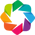

:Overlay
   .Area.C_full_stop_A_full_stop_R_full_stop :Area   [Jaar]   (Migranten,Baseline)
   .Area.Djibouti                            :Area   [Jaar]   (Migranten,Baseline)
   .Area.Gambia                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Guinea                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Kenya                               :Area   [Jaar]   (Migranten,Baseline)
   .Area.Lesotho                             :Area   [Jaar]   (Migranten,Baseline)
   .Area.Liberia                             :Area   [Jaar]   (Migranten,Baseline)
   .Area.Madagascar                          :Area   [Jaar]   (Migranten,Baseline)
   .Area.Malawi                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Mali                                :Area   [Jaar]   (Migranten,Baseline)
   .Area.Mauritania                          :Area   [Jaar]   (Migranten,Baseline)
   .Area.Mozambique                          :Area   [Jaar]   (Migranten,Baseline)
   .Area.Niger                               :Area   [Jaar]   (Migranten,Baseline)
   .Area.Nigeria                             :Area   [Jaar]   (Migranten,Baseline)
   .Area.Rwanda                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Senegal                             :Area   [Jaar]   (Migranten,Baseline)
   .Area.South_Sudan                         :Area   [Jaar]   (Migranten,Baseline)
   .Area.Sudan                               :Area   [Jaar]   (Migranten,Baseline)
   .Area.Uganda                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Zambia                              :Area   [Jaar]   (Migranten,Baseline)
   .Area.Zimbabwe                            :Area   [Jaar]   (Migranten,Baseline)

In [29]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

Central_African_Republic = np.array(select_plot_migration_movements(df_migration, 'Central African Republic', 1980, 2017).Value[0:216])
Djibouti = np.array(select_plot_migration_movements(df_migration, 'Djibouti', 1980, 2017).Value[0:216])
Gambia = np.array(select_plot_migration_movements(df_migration, 'Gambia', 1980, 2017).Value[0:216])
Guinea = np.array(select_plot_migration_movements(df_migration, 'Guinea', 1980, 2017).Value[0:216])
Kenya = np.array(select_plot_migration_movements(df_migration, 'Kenya', 1980, 2017).Value[0:216])
Lesotho = np.array(select_plot_migration_movements(df_migration, 'Lesotho', 1980, 2017).Value[0:216])
Liberia = np.array(select_plot_migration_movements(df_migration, 'Liberia', 1980, 2017).Value[0:216])
Madagascar = np.array(select_plot_migration_movements(df_migration, 'Madagascar', 1980, 2017).Value[0:216])
Malawi = np.array(select_plot_migration_movements(df_migration, 'Malawi', 1980, 2017).Value[0:216])
Mali = np.array(select_plot_migration_movements(df_migration, 'Mali', 1980, 2017).Value[0:216])
Mauritania = np.array(select_plot_migration_movements(df_migration, 'Mauritania', 1980, 2017).Value[0:216])
Mozambique = np.array(select_plot_migration_movements(df_migration, 'Mozambique', 1980, 2017).Value[0:216])
Niger = np.array(select_plot_migration_movements(df_migration, 'Niger', 1980, 2017).Value[0:216])
Nigeria = np.array(select_plot_migration_movements(df_migration, 'Nigeria', 1980, 2017).Value[0:216])
Rwanda = np.array(select_plot_migration_movements(df_migration, 'Rwanda', 1980, 2017).Value[0:216])
Senegal = np.array(select_plot_migration_movements(df_migration, 'Senegal', 1980, 2017).Value[0:216])
South_Sudan = np.array(select_plot_migration_movements(df_migration, 'South Sudan', 1980, 2017).Value[0:216])
Sudan = np.array(select_plot_migration_movements(df_migration, 'Sudan', 1980, 2017).Value[0:216])
Uganda = np.array(select_plot_migration_movements(df_migration, 'Uganda', 1980, 2017).Value[0:216])
Zambia = np.array(select_plot_migration_movements(df_migration, 'Zambia', 1980, 2017).Value[0:216])
Zimbabwe = np.array(select_plot_migration_movements(df_migration, 'Zimbabwe', 1980, 2017).Value[0:216])

dims = dict(kdims='Jaar', vdims='Migranten')
Central_African_Republic = hv.Area(Central_African_Republic, label='C.A.R.', **dims)
Djibouti = hv.Area(Djibouti, label='Djibouti', **dims)
Gambia = hv.Area(Gambia, label='Gambia', **dims)
Guinea = hv.Area(Guinea, label='Guinea', **dims)
Kenya = hv.Area(Kenya, label='Kenya', **dims)
Lesotho = hv.Area(Lesotho, label='Lesotho', **dims)
Liberia = hv.Area(Liberia, label='Liberia', **dims)
Madagascar = hv.Area(Madagascar, label='Madagascar', **dims)
Malawi = hv.Area(Malawi, label='Malawi', **dims)
Mali = hv.Area(Mali, label='Mali', **dims)
Mauritania = hv.Area(Mauritania, label='Mauritania', **dims)
Mozambique = hv.Area(Mozambique, label='Mozambique', **dims)
Niger = hv.Area(Niger, label='Niger', **dims)
Nigeria = hv.Area(Nigeria, label='Nigeria', **dims)
Rwanda = hv.Area(Rwanda, label='Rwanda', **dims)
Senegal = hv.Area(Senegal, label='Senegal', **dims)
South_Sudan = hv.Area(South_Sudan, label='South Sudan', **dims)
Sudan = hv.Area(Sudan, label='Sudan', **dims)
Uganda = hv.Area(Uganda, label='Uganda', **dims)
Zambia = hv.Area(Zambia, label='Zambia', **dims)
Zimbabwe = hv.Area(Zimbabwe, label='Zimbabwe', **dims)

%output size=100
%opts Overlay [show_title=False height=600 width=1300 show_legend=True legend_position='right' fontsize=13 xticks=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216]]
# overlay  = hv.Overlay( spike_train, 'milliseconds', vdims='Hertz')

overlay = hv.Overlay(Central_African_Republic * Djibouti * Gambia * Guinea * Kenya * Lesotho * Liberia * Madagascar * Malawi * Mali * Mauritania * Mozambique * Niger * Nigeria * Rwanda * Senegal * South_Sudan * Sudan * Uganda * Zambia * Zimbabwe).options('Area', fill_alpha=0.5)

overlay = hv.Area.stack(overlay).relabel("Migratiestromen van Afrika naar Europa van 1999 tot 2017")
overlay
# save
# renderer = hv.renderer('bokeh')
# renderer.save(overlay, 'stacked_migration_africa_to_europe')


In [17]:
for country in Middle_East:
#     print("{} = np.array(select_plot_migration_movements(df_migration, {}, 1980, 2017).Value[0:200])".format(country, country))
    print('{} = hv.Area({}, label={}, **dims)'.format(country, country, country))

Afghanistan = hv.Area(Afghanistan, label=Afghanistan, **dims)
Iraq = hv.Area(Iraq, label=Iraq, **dims)
Iran  (Islamic Republic of) = hv.Area(Iran  (Islamic Republic of), label=Iran  (Islamic Republic of), **dims)
Lebanon = hv.Area(Lebanon, label=Lebanon, **dims)
State of Palestine = hv.Area(State of Palestine, label=State of Palestine, **dims)
Pakistan = hv.Area(Pakistan, label=Pakistan, **dims)


In [18]:
len(select_plot_migration_movements(df_migration, 'Afghanistan', 2000, 2017).Value)
# select_plot_migration_movements(df_migration, 'State of Palestine', 1980, 2017)

204

In [19]:
twothousand = []
for i in range(2000):
    twothousand.append(0)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
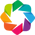

:Overlay
   .Area.Afghanistan        :Area   [Jaar]   (Migranten,Baseline)
   .Area.Pakistan           :Area   [Jaar]   (Migranten,Baseline)
   .Area.Iraq               :Area   [Jaar]   (Migranten,Baseline)
   .Area.Iran               :Area   [Jaar]   (Migranten,Baseline)
   .Area.Lebanon            :Area   [Jaar]   (Migranten,Baseline)
   .Area.State_of_Palestine :Area   [Jaar]   (Migranten,Baseline)

In [30]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

Afghanistan = np.array(select_plot_migration_movements(df_migration, 'Afghanistan', 1980, 2017).Value[0:216])
Pakistan = np.array(select_plot_migration_movements(df_migration, 'Pakistan', 1980, 2017).Value[0:216])
Iraq = np.array(select_plot_migration_movements(df_migration, 'Iraq', 1980, 2017).Value[0:216])
Iran = np.array(select_plot_migration_movements(df_migration, 'Iran', 1980, 2017).Value[0:216])
Lebanon = np.array(select_plot_migration_movements(df_migration, 'Lebanon', 1980, 2017).Value[0:216])
State_of_Palestine = np.array(select_plot_migration_movements(df_migration, 'State of Palestine', 1980, 2017).Value[0:216])

dims = dict(kdims='Jaar', vdims='Migranten')
Afghanistan = hv.Area(Afghanistan, label='Afghanistan', **dims)
Pakistan = hv.Area(Pakistan, label='Pakistan', **dims)
Iraq = hv.Area(Iraq, label='Iraq', **dims)
Iran = hv.Area(Iran, label='Iran', **dims)
Lebanon = hv.Area(Lebanon, label='Lebanon', **dims)
State_of_Palestine = hv.Area(State_of_Palestine, label='State of Palestine', **dims)

%output size=100
%opts Overlay [show_title=False height=600 width=1300 show_legend=True legend_position='right' fontsize=13 xticks=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216]]
# overlay  = hv.Overlay( spike_train, 'milliseconds', vdims='Hertz')

overlay = hv.Overlay(Afghanistan * Pakistan * Iraq * Iran * Lebanon * State_of_Palestine).options('Area', fill_alpha=0.5)
overlay = overlay.select(Jaren=(0,216))


hv.Area.stack(overlay).relabel("Migratiestromen van het Midden-Oosten naar Europa van 1999 tot 2017")

# save
# renderer = hv.renderer('bokeh')
# renderer.save(overlay, 'stacked_migration_middle-east_to_europe')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
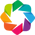

In [21]:
import holoviews as hv
from bokeh.io import show, output_file
from bokeh.models import FactorRange
from bokeh.plotting import figure
import bokeh.layouts
from bokeh.layouts import column
hv.extension('bokeh', 'matplotlib')

def normalise(input_data):

    values = []
    
    for value in input_data:
         values.append(value)
            
    Min = min(values)
    Max = max(values)
        
    output_data = []
    
    for value in input_data:
        output_data.append((value - Min)/(Max - Min))
    
    input_data['Normalized_data'] = output_data

    return input_data

def select_plot_temperature_and_precipitation(input_data, country, year1, year2):
    
    x_range = range(year1,year2)
    
    saved_dict = {'mauritania': 'MRT', 'lesotho': 'LSO', 'somalia': 'SOM', 'nigeria': 'NGA', 'tanzania': 'TZA', 'zambia': 'ZMB', 'burundi': 'BDI', 'afghanistan': 'AFG', 'mali': 'MLI', 'niger': 'NER', 'malawi': 'MWI', 'congo': 'ZAR', 'cabo verde': 'CPV', 'Sudan': 'SDN', 'pakistan': 'PAK', 'burkina faso': 'BFA', 'rwanda': 'RWA', 'kenia': 'KEN', 'senegal': 'SEN', 'cameroon': 'CMR', 'sierra leone': 'SLE', 'iraq': 'IRQ', 'uganda': 'UGA', 'mozambique': 'MOZ', 'zimbabwe': 'ZWE', 'central african republic': 'CAF', 'ethiopia': 'ETH', 'guinea': 'GIN', 'liberia': 'LBR', 'djibouti': 'DJI', 'iran': 'IRN', 'madagascar': 'MDG', 'lebanon': 'LBN'}

    if country in saved_dict.keys():
        country = saved_dict[country]
    else:
        print("Please enter correct country name")
    
    input_data = pd.DataFrame(input_data.loc[input_data['country'] == country])
    input_data = input_data.loc[(input_data['year'] > year1 - 1) & (input_data['year'] < year2 + 1)]
    
#   maak van de jaren en maanden kommajaren
    YearMonth = []
    month = []
    for row in input_data['month']:
        month.append(str(row))
        
    count = 0
    
    for year in input_data['year']:
        
        year = int(year) + (int(month[count])  - 1)/ 12
        YearMonth.append(year)
        count += 1
        
    input_data['YearMonth'] = YearMonth
    input_data = input_data[['pr', 'tas', 'country', 'YearMonth']]
    
    
    return input_data


def bar_graph(input_data, country, year1, year2, target_data1, target_data2):
    
    frame = select_plot_temperature_and_precipitation(input_data, country, year1, year2)

    df1 = normalise(frame[target_data1])
    df2 = normalise(frame[target_data2])
    
    #print(df1)
    
    for cell in df1:
        if type(cell) == list:
            
            data_inject1 = cell
            break
            
    for cell in df2:

        if type(cell) == list:
            
            data_inject2 = cell
            break

    % output size = 250
    % opts Curve (color='red')
    
    bars = hv.Bars(data_inject1, "{}".format(country), 'precipitation and temperature', label = 'precipitation')
    line = hv.Curve(data_inject2, "{}".format(country), 'precipitation and temperature',label = 'temperature')
    
    # function to call food data 
    
    plot = bars * line  
    
    return plot

# Foodprices chord chart

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
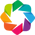

In [22]:
from bokeh.sampledata.les_mis import data
import matplotlib

hv.extension('bokeh')
%output size=300

In [241]:
# plot a chord chart for foodprics
%opts Chord [label_index='index'  edge_color_index='country' color_index='COUNTRY' ]
%opts Chord (cmap='rainbow' edge_cmap='rainbow')

hv.Chord(df_products_per_country)

# save
renderer = hv.renderer('bokeh')
Chord = hv.Chord(df_products_per_country)
renderer.save(Chord, 'chord_chart_middle_east')

In [136]:

df_products_per_country = pd.DataFrame()

for country in Middle_East:
    for product in products_country(df_foodprices, country):
        df_products_per_country = df_products_per_country.append([[country, product, 20]], ignore_index=True)
#         print(country, products_country(df_foodprices, country))
df_products_per_country.columns = ['country', 'product', 'value']
df_products_per_country.to_csv('df_products_per_country_middle_east.csv')
# df_products_per_country

In [145]:
df_products_per_country = pd.DataFrame()

for country in Africa:
    for product in products_country(df_foodprices, country):
        df_products_per_country = df_products_per_country.append([[country, product, 20]], ignore_index=True)
df_products_per_country.columns = ['country', 'product', 'value']
df_products_per_country.to_csv('df_products_per_country_africa.csv')
# df_products_per_country

In [240]:
df_products_per_country = pd.read_csv('df_products_per_country_middle_east_cleaned.csv')
df_products_per_country = df_products_per_country[['country', 'product', 'value']]
df_products_per_country

country      product  value
0          Afghanistan        Bread     20
1          Afghanistan        Wheat     20
2          Afghanistan         Rice     20
3          Afghanistan         Wage     20
4          Afghanistan    Livestock     20
5                 Iraq         Rice     20
6                 Iraq  Wheat flour     20
7                 Iraq        Sugar     20
8                 Iraq        Bread     20
9                 Iraq          Oil     20
10             Lebanon  Wheat flour     20
11             Lebanon        Beans     20
12             Lebanon         Eggs     20
13             Lebanon        Sugar     20
14             Lebanon      Lentils     20
15             Lebanon        Pasta     20
16             Lebanon         Meat     20
17             Lebanon      Cabbage     20
18             Lebanon          Oil     20
19             Lebanon         Salt     20
20             Lebanon    Cucumbers     20
21             Lebanon         Milk     20
22             Lebanon    Chickpeas     20
23             Lebanon       Bulgur     20
24             Lebanon         Rice     20
25             Lebanon     Tomatoes     20
26             Lebanon      Lettuce     20
27             Lebanon       Cheese     20
28             Lebanon         Meat     20
29             Lebanon         Fish     20
..                 ...          ...    ...
52  State of Palestine    Chickpeas     20
53  State of Palestine          Tea     20
54  State of Palestine          Oil     20
55  State of Palestine      Labaneh     20
56  State of Palestine       Yogurt     20
57  State of Palestine       Cheese     20
58  State of Palestine         Milk     20
59  State of Palestine         Fish     20
60  State of Palestine        Water     20
61  State of Palestine        Wheat     20
62            Pakistan  Wheat flour     20
63            Pakistan         Rice     20
64            Pakistan      Lentils     20
65            Pakistan         Milk     20
66            Pakistan          Oil     20
67            Pakistan        Wheat     20
68            Pakistan         Eggs     20
69            Pakistan        Sugar     20
70            Pakistan         Ghee     20
71            Pakistan         Rice     20
72            Pakistan      Poultry     20
73            Pakistan         Salt     20
74            Pakistan      Lentils     20
75            Pakistan        Beans     20
76            Pakistan         Wage     20
77                Iran         Rice     20
78                Iran         Eggs     20
79                Iran          Oil     20
80                Iran        Sugar     20
81                Iran      Lentils     20

[82 rows x 3 columns]